### Assignment Part-I

1. **introduction :**  A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. 
2. **What we need to find ?**  You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

3. **what company want to know using your model.** 
    a. Which variables are significant in predicting the price of a house
    b. How well those variables describe the price of a house. 
    Also, determine the optimal value of lambda for ridge and lasso regression.


### Lets list down the steps we would like to do in order to sove this problem and buld the model 

1. **Step 1:** Data import and Visualization 
2. **Step 2:** Data CleanUp and preparation EDA
3. **Step 3:** Model Building 
4. **Step 4:** Model Evaluation 

In [123]:
# lets import the nessarry packages 

import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [124]:
# lets read data set and have a look atit
HousingDataSet = pd.read_csv("train.csv", na_values="NAN")
HousingDataSet.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [125]:
# lets check info for the given data set
print(HousingDataSet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [128]:
HousingDataSet.shape

(1460, 81)

### Data Cleanup

#### Lets Check the missing values in our data set

In [129]:
# we have totally 81 columns and 1460 rows lets find missing values percentage for each column
missingvalues = (HousingDataSet.isnull().sum() / HousingDataSet.isnull().count()*100).sort_values(ascending = False)
datatype=HousingDataSet.dtypes
missing_data = pd.concat([missingvalues, datatype], axis=1, keys=['MissingValues', 'DataType'])
print(missing_data.head(25))

              MissingValues DataType
PoolQC            99.520548   object
MiscFeature       96.301370   object
Alley             93.767123   object
Fence             80.753425   object
FireplaceQu       47.260274   object
LotFrontage       17.739726  float64
GarageYrBlt        5.547945  float64
GarageCond         5.547945   object
GarageType         5.547945   object
GarageFinish       5.547945   object
GarageQual         5.547945   object
BsmtFinType2       2.602740   object
BsmtExposure       2.602740   object
BsmtQual           2.534247   object
BsmtCond           2.534247   object
BsmtFinType1       2.534247   object
MasVnrArea         0.547945  float64
MasVnrType         0.547945   object
Electrical         0.068493   object
Id                 0.000000    int64
Functional         0.000000   object
Fireplaces         0.000000    int64
KitchenQual        0.000000   object
KitchenAbvGr       0.000000    int64
BedroomAbvGr       0.000000    int64


Clearly Column like **PoolQC, Miscfeature, alley, Fence** has highest missing vlaues more than **80%** data is missing but actually when we see the Data Dictionary we find that, it actually has the values as "NA" which is considered as NAN by python 

In [130]:
#Lets work with the missing values in all object features in our dataset

Features_Missing = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageType", "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]

In [131]:
for i in Features_Missing:
    HousingDataSet[i].fillna("None", inplace=True)
    HousingDataSet[i].fillna("None", inplace=True)

In [132]:
HousingDataSet.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   
5   6          50       RL         85.0    14115   Pave  None      IR1   
6   7          20       RL         75.0    10084   Pave  None      Reg   
7   8          60       RL          NaN    10382   Pave  None      IR1   
8   9          50       RM         51.0     6120   Pave  None      Reg   
9  10         190       RL         50.0     7420   Pave  None      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0   None   None        None       0   
1         Lvl    AllPub  ...        0   None   None        None       0   
2         Lvl    AllPub  ...        0   None   None        None       0   
3         Lvl    AllPub  ...        0   None   None        None       0   
4         Lvl    AllPub  ...        0   None   None        None       0   
5         Lvl    AllPub  ...        0   None  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0   None   None        None       0   
7         Lvl    AllPub  ...        0   None   None        Shed     350   
8         Lvl    AllPub  ...        0   None   None        None       0   
9         Lvl    AllPub  ...        0   None   None        None       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [133]:
missingvalues = (HousingDataSet.isnull().sum() / HousingDataSet.isnull().count()*100).sort_values(ascending = False)
datatype=HousingDataSet.dtypes
missing_data = pd.concat([missingvalues, datatype], axis=1, keys=['MissingValues', 'DataType'])
print(missing_data.head(25))

              MissingValues DataType
LotFrontage       17.739726  float64
GarageYrBlt        5.547945  float64
MasVnrType         0.547945   object
MasVnrArea         0.547945  float64
Electrical         0.068493   object
KitchenQual        0.000000   object
GarageType         0.000000   object
FireplaceQu        0.000000   object
Fireplaces         0.000000    int64
Functional         0.000000   object
TotRmsAbvGrd       0.000000    int64
Id                 0.000000    int64
GarageFinish       0.000000   object
BedroomAbvGr       0.000000    int64
HalfBath           0.000000    int64
FullBath           0.000000    int64
BsmtHalfBath       0.000000    int64
BsmtFullBath       0.000000    int64
GrLivArea          0.000000    int64
LowQualFinSF       0.000000    int64
2ndFlrSF           0.000000    int64
KitchenAbvGr       0.000000    int64
GarageCars         0.000000    int64
GarageArea         0.000000    int64
PoolQC             0.000000   object


In [134]:
#from sklearn.preprocessing import Imputer to replace missing values in a dataset, using a variety of input strategies
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [135]:
missingvalues = (HousingDataSet.isnull().sum() / HousingDataSet.isnull().count()*100).sort_values(ascending = False)
datatype=HousingDataSet.dtypes
missing_data = pd.concat([missingvalues, datatype], axis=1, keys=['MissingValues', 'DataType'])
print(missing_data.head(10))

             MissingValues DataType
LotFrontage      17.739726  float64
GarageYrBlt       5.547945  float64
MasVnrType        0.547945   object
MasVnrArea        0.547945  float64
Electrical        0.068493   object
KitchenQual       0.000000   object
GarageType        0.000000   object
FireplaceQu       0.000000   object
Fireplaces        0.000000    int64
Functional        0.000000   object


In [136]:
#imputing the the data for missing numerical data 
HousingDataSet['LotFrontage']=HousingDataSet['LotFrontage'].fillna(HousingDataSet['LotFrontage'].median())
HousingDataSet['GarageYrBlt']=HousingDataSet['GarageYrBlt'].fillna(HousingDataSet['GarageYrBlt'].median())
HousingDataSet['MasVnrArea']=HousingDataSet['MasVnrArea'].fillna(HousingDataSet['MasVnrArea'].median())

In [137]:
missingvalues = (HousingDataSet.isnull().sum() / HousingDataSet.isnull().count()*100).sort_values(ascending = False)
datatype=HousingDataSet.dtypes
missing_data = pd.concat([missingvalues, datatype], axis=1, keys=['MissingValues', 'DataType'])
print(missing_data.head(10))

              MissingValues DataType
MasVnrType         0.547945   object
Electrical         0.068493   object
GarageFinish       0.000000   object
GarageType         0.000000   object
FireplaceQu        0.000000   object
Fireplaces         0.000000    int64
Functional         0.000000   object
TotRmsAbvGrd       0.000000    int64
KitchenQual        0.000000   object
KitchenAbvGr       0.000000    int64


In [138]:
HousingDataSet.dropna(inplace = True)

In [139]:
HousingDataSet.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [140]:
HousingDataSet=HousingDataSet.drop(['Id'], axis=1)

In [141]:
HousingDataSet.shape

(1451, 80)

### We removed 9 null value rows and Id Column as this is not required 

## Exploratory Data Analysis

<Axes: xlabel='SalePrice', ylabel='Density'>

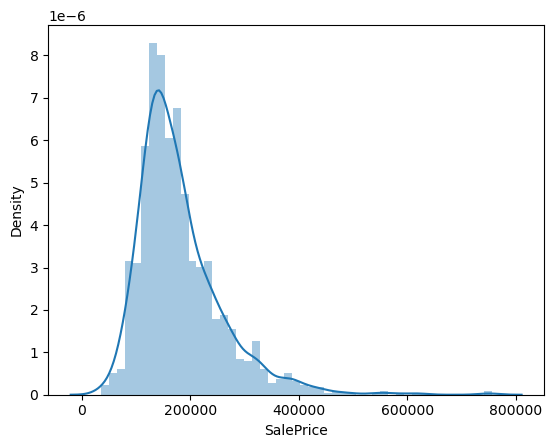

In [142]:
#Let's visualize the distribution of sale price
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(HousingDataSet['SalePrice'])

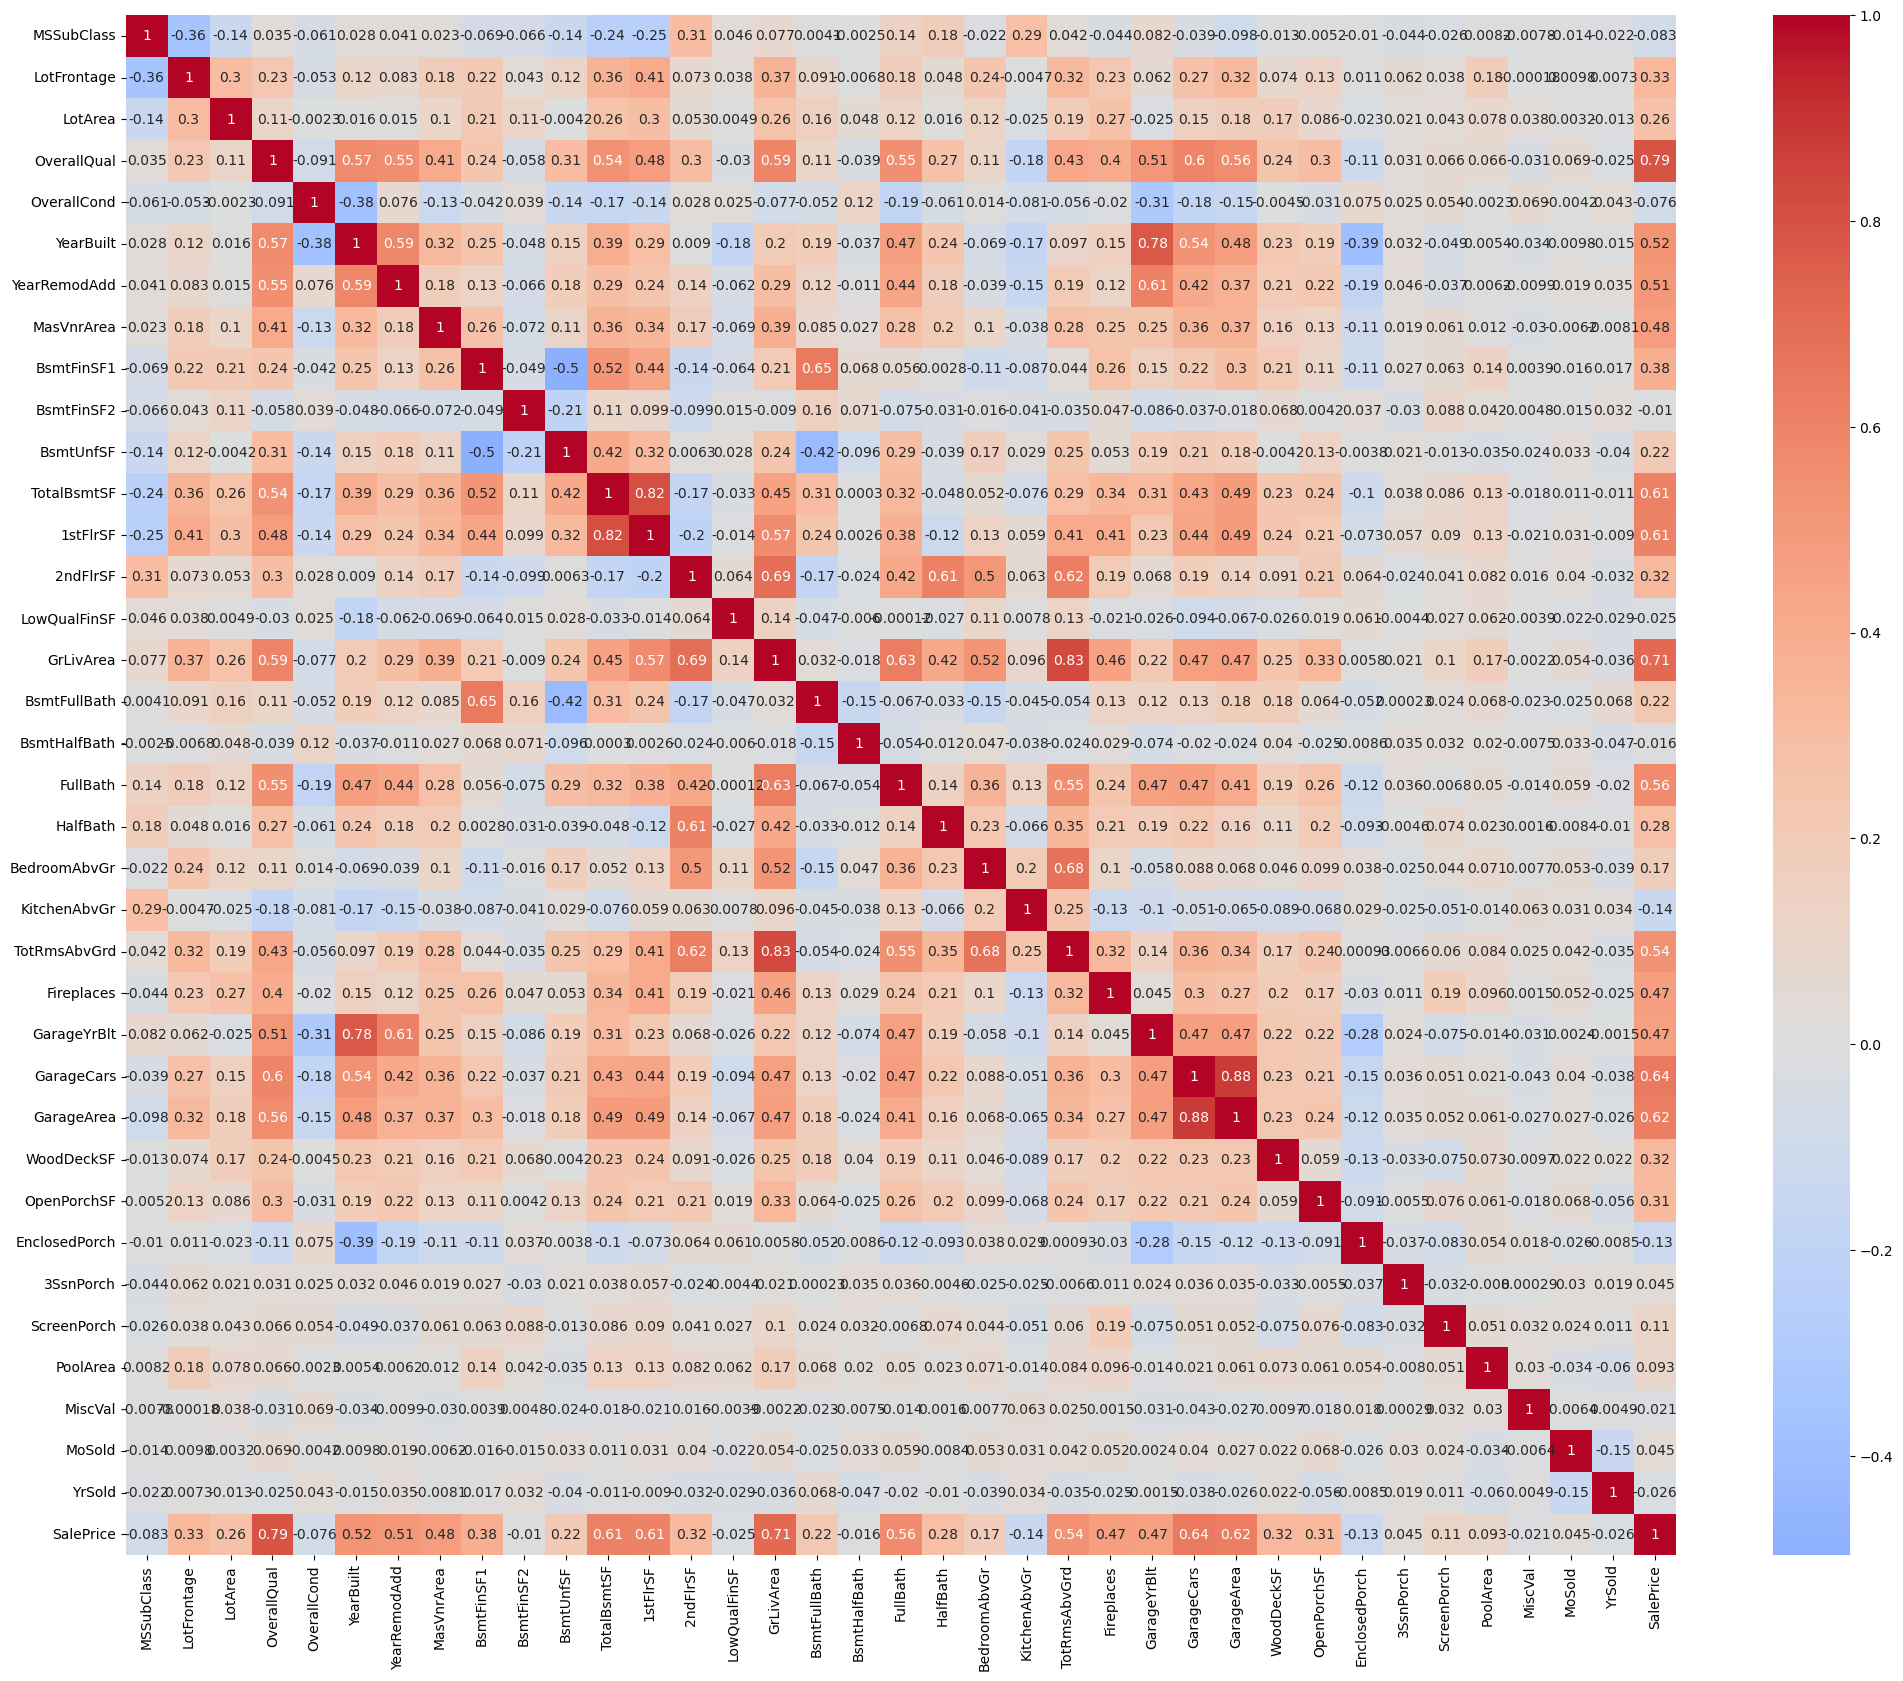

In [143]:
#correlation matrix
corrmat = HousingDataSet.corr()
f, ax = plt.subplots(figsize = (25,20))
sns.heatmap(corrmat, cmap='coolwarm', annot=True, center = 0);

In [144]:
# Creating a new Column to determine the age of the property
HousingDataSet['age']=HousingDataSet['YrSold']-HousingDataSet['YearBuilt']
HousingDataSet['garage_age'] = HousingDataSet['YrSold'] - HousingDataSet['GarageYrBlt']
HousingDataSet['remodel_age'] = HousingDataSet['YrSold'] - HousingDataSet['YearRemodAdd']

HousingDataSet.drop('GarageYrBlt',axis=1,inplace=True)

In [145]:
HousingDataSet.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub    Inside  ...        None       0      2   2008   
1         Lvl    AllPub       FR2  ...        None       0      5   2007   
2         Lvl    AllPub    Inside  ...        None       0      9   2008   
3         Lvl    AllPub    Corner  ...        None       0      2   2006   
4         Lvl    AllPub       FR2  ...        None       0     12   2008   

  SaleType SaleCondition  SalePrice  age  garage_age  remodel_age  
0       WD        Normal     208500    5         5.0            5  
1       WD        Normal     181500   31        31.0           31  
2       WD        Normal     223500    7         7.0            6  
3       WD       Abnorml     140000   91         8.0           36  
4       WD        Normal     250000    8         8.0            8  

[5 rows x 82 columns]

In [146]:
# there are some features which are numerical but when we have a look at the values its categorical features
#so we need to conevert these numerical variavles into categorical variables 
HousingDataSet[['MSSubClass']] = HousingDataSet[['MSSubClass']].astype(str) 
HousingDataSet['YrSold'] = HousingDataSet['YrSold'].astype(str)
HousingDataSet['MoSold'] = HousingDataSet['MoSold'].astype(str)
HousingDataSet.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   
3         70       RL         60.0     9550   Pave  None      IR1         Lvl   
4         60       RL         84.0    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0    AllPub    Inside  ...        None       0      2   2008       WD   
1    AllPub       FR2  ...        None       0      5   2007       WD   
2    AllPub    Inside  ...        None       0      9   2008       WD   
3    AllPub    Corner  ...        None       0      2   2006       WD   
4    AllPub       FR2  ...        None       0     12   2008       WD   

  SaleCondition  SalePrice  age  garage_age  remodel_age  
0        Normal     208500    5         5.0            5  
1        Normal     181500   31        31.0           31  
2        Normal     223500    7         7.0            6  
3       Abnorml     140000   91         8.0           36  
4        Normal     250000    8         8.0            8  

[5 rows x 82 columns]

### Lets check the values count in categorical variable to check if it makes impact

In [147]:
# lets create a function to check the value count of all the columne in data set for categorical columns
def check_Cat_value_count(HousingSet):
    redundant = []
    for i in HousingSet.columns:
        print(HousingSet[i].value_counts())
   
    return None

In [148]:
categorical = HousingDataSet.select_dtypes(exclude=['int64','float64'])
check_Cat_value_count(HousingDataSet[categorical.columns])

20     532
60     296
50     144
120     86
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1445
Grvl       6
Name: Street, dtype: int64
None    1361
Grvl      50
Pave      40
Name: Alley, dtype: int64
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel 

 from the above output we can see that Utilities, Street, PoolQC, PoolArea has mostly one same categorical value 
 lets check them out

In [149]:
check_Cat_value_count(HousingDataSet[['Utilities','Street','PoolQC','PoolArea']])

AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1445
Grvl       6
Name: Street, dtype: int64
None    1444
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64
0      1444
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [152]:
# so lets drop these columns
HousingDataSet.drop(['Utilities','Street','PoolQC','PoolArea'],  axis=1, inplace=True)

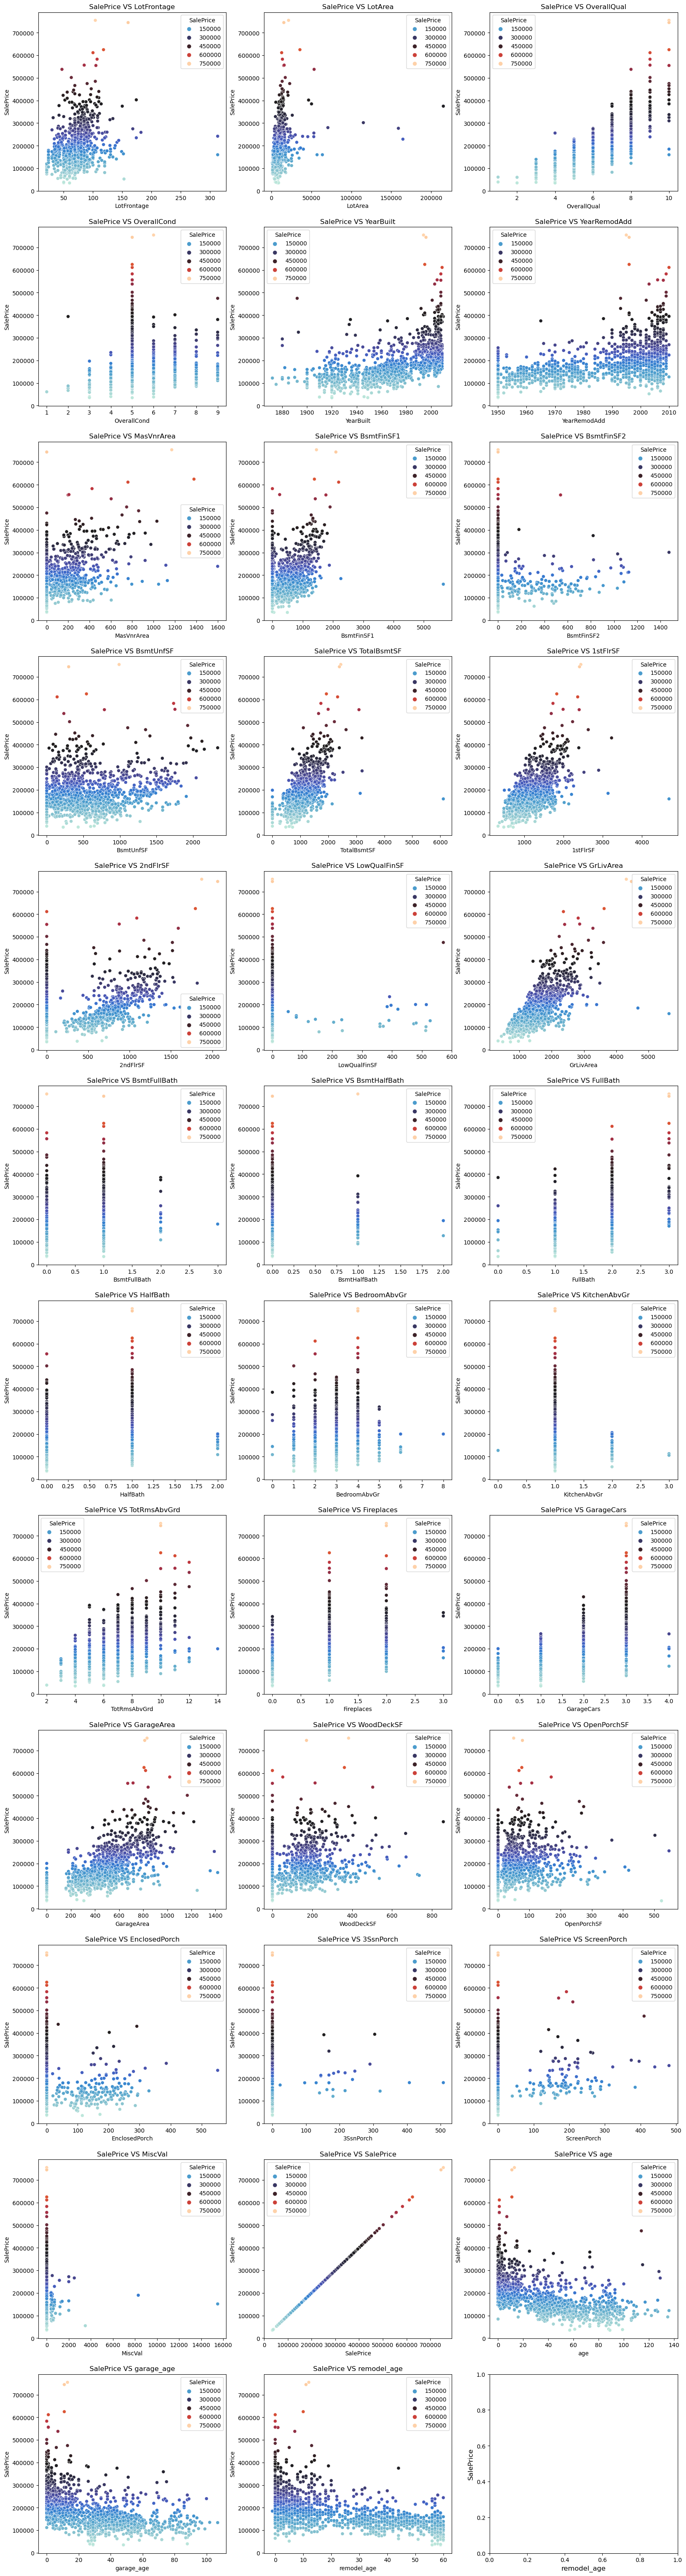

In [153]:
#Visualising numerical predictor variables with Target Variables
num_var = HousingDataSet.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(num_var.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=num_var,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

#### points to be noted from above plots 
1. GRLiving Area has a strong corelation with SalePrice
2. MoSold has no much effect on SalesPrice

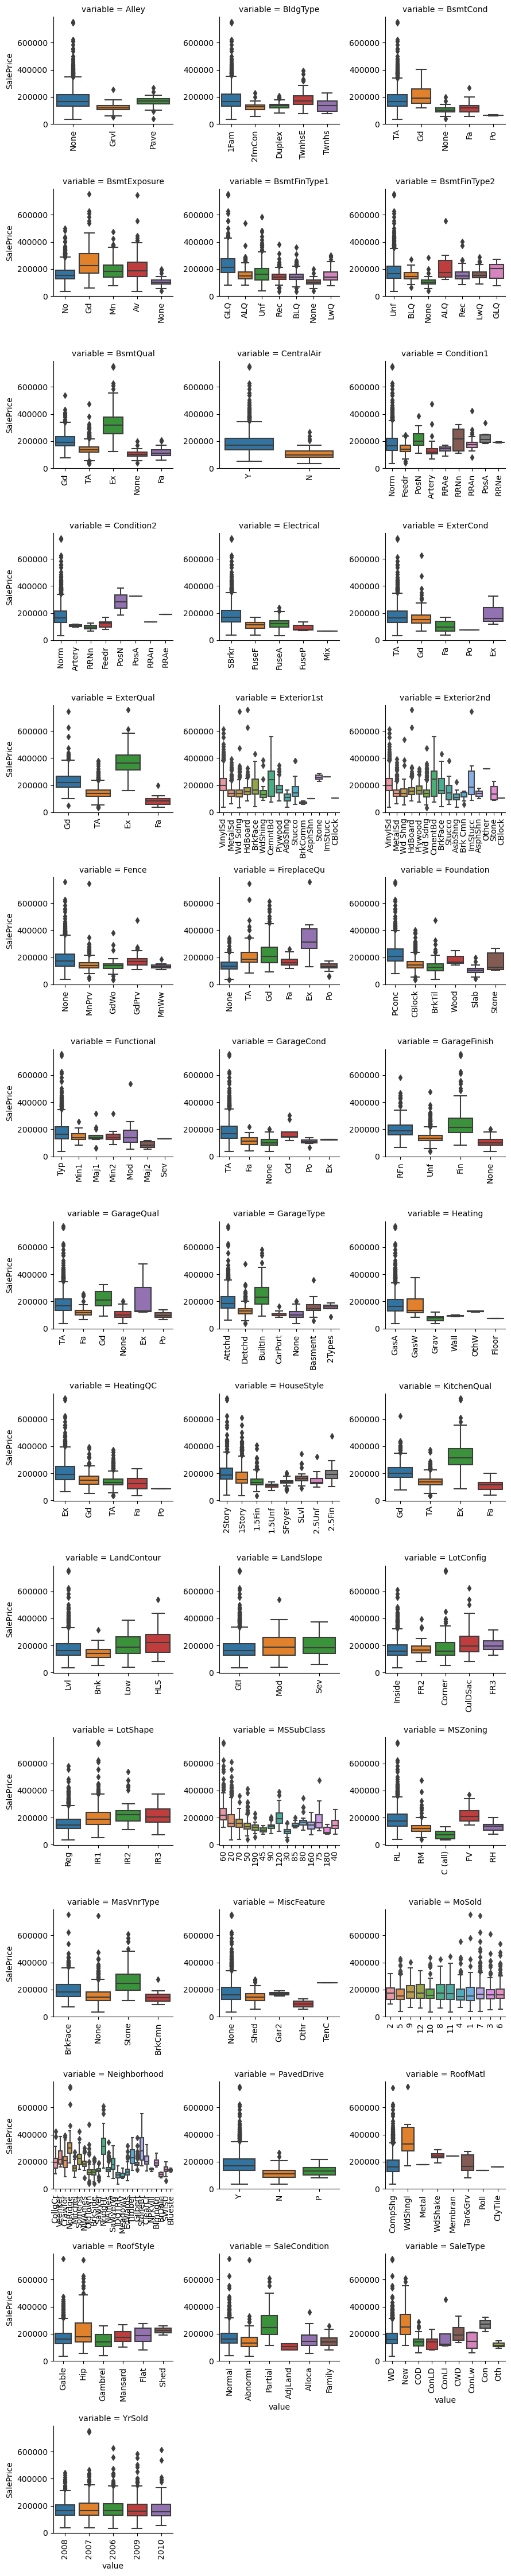

In [154]:
# lets plot boxplot for all the categorical variable with Sale Price
def drow_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = HousingDataSet.select_dtypes(exclude=['int64','float64'])
f = pd.melt(HousingDataSet, id_vars=['SalePrice'], value_vars=sorted(HousingDataSet[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(drow_boxplot, "value", "SalePrice")

### Points from boxplot for categorical variables
1. when Basment highet is Excellent (100+ inches) such House are costly as compare to others.
2. House with Central Air Conditionar are more costlier then other homes.
3. Foundation with Poured Contrete are with high SalePrice.
4. Houses with Excelent Heating quality and condition are high priced. 

In [155]:
HousingDataSet.shape

(1451, 78)

In [156]:
# outlier treatment. 

num_col = list(HousingDataSet.dtypes[HousingDataSet.dtypes !='object'].index)
#num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
 #          'EnclosedPorch','3SsnPorch',
 #          'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

HousingDataSet = drop_outliers(HousingDataSet)

In [157]:
HousingDataSet.shape

(1435, 78)

In [158]:
HousingDataSet[list(HousingDataSet.dtypes[HousingDataSet.dtypes=='object'].index)].head()

MSSubClass MSZoning Alley LotShape LandContour LotConfig LandSlope  \
0         60       RL  None      Reg         Lvl    Inside       Gtl   
1         20       RL  None      Reg         Lvl       FR2       Gtl   
2         60       RL  None      IR1         Lvl    Inside       Gtl   
3         70       RL  None      IR1         Lvl    Corner       Gtl   
4         60       RL  None      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm       Norm  ...          RFn         TA         TA   
1      Veenker      Feedr       Norm  ...          RFn         TA         TA   
2      CollgCr       Norm       Norm  ...          RFn         TA         TA   
3      Crawfor       Norm       Norm  ...          Unf         TA         TA   
4      NoRidge       Norm       Norm  ...          RFn         TA         TA   

  PavedDrive Fence MiscFeature MoSold YrSold SaleType SaleCondition  
0          Y  None        None      2   2008       WD        Normal  
1          Y  None        None      5   2007       WD        Normal  
2          Y  None        None      9   2008       WD        Normal  
3          Y  None        None      2   2006       WD       Abnorml  
4          Y  None        None     12   2008       WD        Normal  

[5 rows x 43 columns]

In [159]:
categorical_Name=categorical.columns
print(categorical_Name)

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [160]:
for i in categorical_Name:
    feature_set = set(HousingDataSet[i])
    for j in feature_set:
        feature_list = list(feature_set)
        HousingDataSet.loc[HousingDataSet[i] == j, i] = feature_list.index(j)

In [161]:
HousingDataSet.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0          1        2         65.0     8450     1        3           0   
1          3        2         80.0     9600     1        3           0   
2          1        2         68.0    11250     1        2           0   
3          0        2         60.0     9550     1        2           0   
4          1        2         84.0    14260     1        2           0   

  LotConfig LandSlope Neighborhood  ... MiscFeature MiscVal MoSold YrSold  \
0         0         0            4  ...           1       0      8      1   
1         4         0           20  ...           1       0     11      2   
2         0         0            4  ...           1       0      6      1   
3         2         0           13  ...           1       0      8      4   
4         4         0            0  ...           1       0      9      1   

   SaleType  SaleCondition  SalePrice  age garage_age remodel_age  
0         3              4     208500    5        5.0           5  
1         3              4     181500   31       31.0          31  
2         3              4     223500    7        7.0           6  
3         3              3     140000   91        8.0          36  
4         3              4     250000    8        8.0           8  

[5 rows x 78 columns]

## Model Building

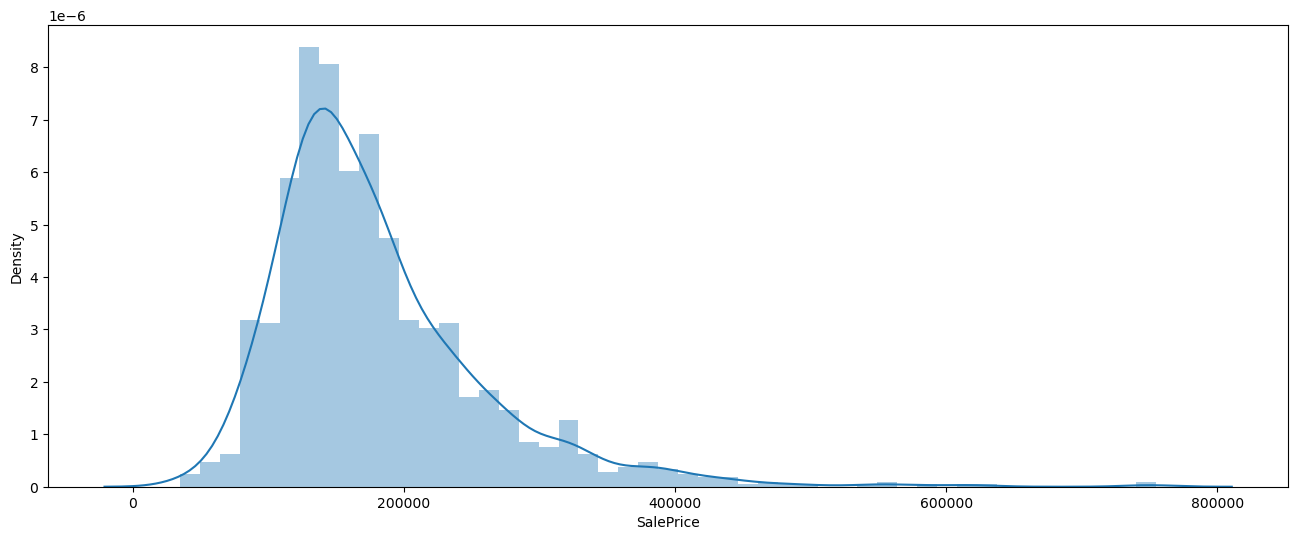

In [162]:
# lets check the Price distrubution 
plt.figure(figsize=(16,6))
sns.distplot(HousingDataSet["SalePrice"])
plt.show()

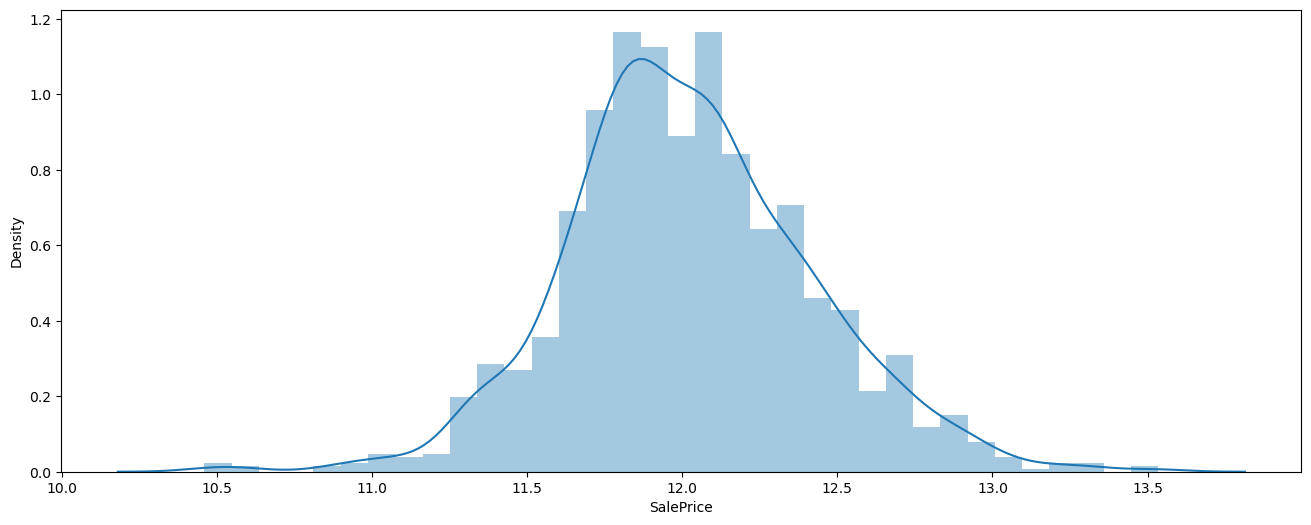

In [163]:

plt.figure(figsize=(16,6))
sns.distplot(np.log(HousingDataSet["SalePrice"]))
plt.show()

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

In [164]:
HousingDataSet["TransformedPrice"] = np.log(HousingDataSet["SalePrice"])

In [165]:
HousingDataSet.drop('SalePrice',axis=1,inplace=True)

### Creating train and test dataset 

In [205]:
# model building packages
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [186]:
X = HousingDataSet.drop(["TransformedPrice"], axis=1)
y = HousingDataSet["TransformedPrice"]

In [187]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [208]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [209]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Alley  LotShape  LandContour  \
0    0.714286       0.5     0.298137  0.165561    0.5  1.000000          1.0   
1    0.928571       0.5     0.304348  0.102216    0.5  1.000000          0.0   
2    1.000000       0.5     0.180124  0.102288    1.0  1.000000          0.0   
3    0.142857       0.5     0.055901  0.118757    0.5  0.666667          0.0   
4    0.071429       0.0     0.273292  0.098257    0.5  1.000000          0.0   

   LotConfig  LandSlope  Neighborhood  ...  Fence  MiscFeature  MiscVal  \
0       0.00        1.0      0.375000  ...   0.00          0.5      0.0   
1       0.00        0.0      0.333333  ...   0.00          0.5      0.0   
2       0.00        0.0      0.958333  ...   0.25          0.5      0.0   
3       0.75        0.0      0.833333  ...   0.00          0.5      0.0   
4       0.00        0.0      0.750000  ...   0.00          0.5      0.0   

     MoSold  YrSold  SaleType  SaleCondition       age  garage_age  \
0  0.909091    0.75     0.375            0.8  0.147059    0.186916   
1  1.000000    0.50     0.375            0.8  0.301471    0.158879   
2  0.363636    0.25     0.375            0.8  0.794118    0.280374   
3  0.363636    1.00     0.375            0.8  0.080882    0.102804   
4  0.909091    1.00     0.875            0.0  0.000000    0.000000   

   remodel_age  
0     0.344262  
1     0.688525  
2     0.967213  
3     0.180328  
4     0.016393  

[5 rows x 77 columns]

In [210]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9104090019256417
Testing R2
0.8878147608634


In [211]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

### Ridge Regression

In [212]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

In [213]:
# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [214]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [215]:
# Applying Lasso

lasso = Lasso()
# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 11 folds for each of 28 candidates, totalling 308 fits


GridSearchCV(cv=11, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [216]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004721      0.004753         0.004084        0.006248      0.0001   
1       0.004225      0.004760         0.003801        0.005127       0.001   
2       0.007178      0.007286         0.001420        0.004492        0.01   
3       0.006228      0.007298         0.002841        0.006026        0.05   
4       0.002830      0.006004         0.004261        0.006959         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.915013           0.931126           0.874201   
1   {'alpha': 0.001}           0.915007           0.931144           0.874226   
2    {'alpha': 0.01}           0.914943           0.931309           0.874458   
3    {'alpha': 0.05}           0.914683           0.931833           0.875287   
4     {'alpha': 0.1}           0.914417           0.932238           0.876094   

   split3_test_score  ...  split3_train_score  split4_train_score  \
0           0.888087  ...            0.911313            0.916609   
1           0.888065  ...            0.911313            0.916609   
2           0.887858  ...            0.911310            0.916606   
3           0.887129  ...            0.911270            0.916551   
4           0.886503  ...            0.911198            0.916453   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.905960            0.925048            0.912213   
1            0.905960            0.925048            0.912213   
2            0.905955            0.925043            0.912210   
3            0.905884            0.924979            0.912170   
4            0.905759            0.924867            0.912097   

   split8_train_score  split9_train_score  split10_train_score  \
0            0.910491            0.909584             0.909098   
1            0.910491            0.909584             0.909098   
2            0.910487            0.909580             0.909095   
3            0.910422            0.909508             0.909036   
4            0.910310            0.909384             0.908933   

   mean_train_score  std_train_score  
0          0.911625         0.005011  
1          0.911624         0.005011  
2          0.911621         0.005011  
3          0.911561         0.005012  
4          0.911456         0.005015  

[5 rows x 33 columns]

In [217]:
cv_results = cv_results[cv_results['param_alpha']<=30]

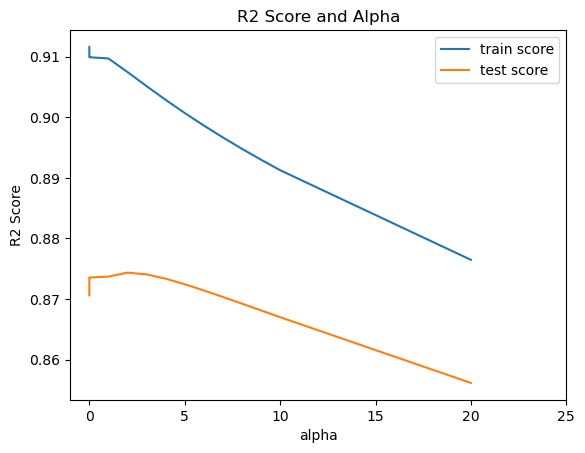

In [218]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

In [227]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha,random_state=100)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.8935174036340958
The MSE of the model on the test dataset for optimum alpha is 0.01893737458218834


In [219]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1004 non-null   float64
 1   MSZoning       1004 non-null   float64
 2   LotFrontage    1004 non-null   float64
 3   LotArea        1004 non-null   float64
 4   Alley          1004 non-null   float64
 5   LotShape       1004 non-null   float64
 6   LandContour    1004 non-null   float64
 7   LotConfig      1004 non-null   float64
 8   LandSlope      1004 non-null   float64
 9   Neighborhood   1004 non-null   float64
 10  Condition1     1004 non-null   float64
 11  Condition2     1004 non-null   float64
 12  BldgType       1004 non-null   float64
 13  HouseStyle     1004 non-null   float64
 14  OverallQual    1004 non-null   float64
 15  OverallCond    1004 non-null   float64
 16  YearBuilt      1004 non-null   float64
 17  YearRemodAdd   1004 non-null   float64
 18  RoofStyl

In [220]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

Features  VIF
76   remodel_age  inf
31    BsmtFinSF1  inf
34     BsmtUnfSF  inf
35   TotalBsmtSF  inf
17  YearRemodAdd  inf
16     YearBuilt  inf
40      1stFlrSF  inf
41      2ndFlrSF  inf
42  LowQualFinSF  inf
43     GrLivArea  inf
74           age  inf
33    BsmtFinSF2  inf

In [221]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Now using VIF we have removed the Multicolinearity 

In [222]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

In [223]:
# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 11 folds for each of 28 candidates, totalling 308 fits


In [224]:
cv_results = cv_results[cv_results['param_alpha']<=30]

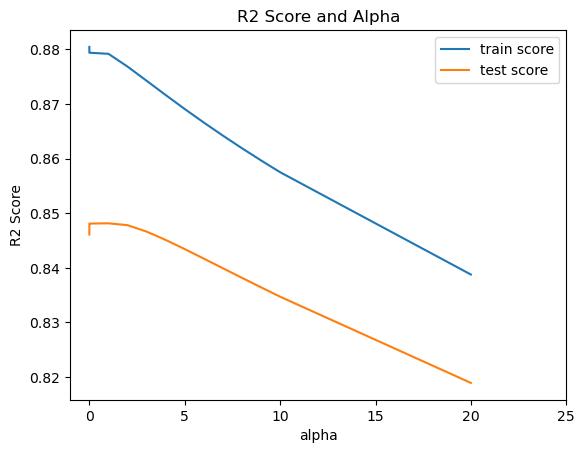

In [225]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

In [228]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.8625273548798731
The MSE of the model on the test dataset for optimum alpha is 0.024448793176475275


In [229]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
OverallQual              0.744589
LotArea                  0.315264
Condition2               0.310771
SaleType                 0.292043
TotRmsAbvGrd             0.288071
OverallCond              0.279143
FullBath                 0.269663
GarageArea               0.250040
BsmtFullBath             0.197690
Fireplaces               0.174043
LotFrontage              0.153911
WoodDeckSF               0.148162
ScreenPorch              0.140376
MasVnrArea               0.123568
GarageCars               0.114842
3SsnPorch                0.104617
Heating                  0.090333
SaleCondition            0.089355
BsmtHalfBath             0.086696
BsmtQual                 0.085266

above 20 variables are having impact on price of the property 

In [231]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

Fitting 11 folds for each of 32 candidates, totalling 352 fits


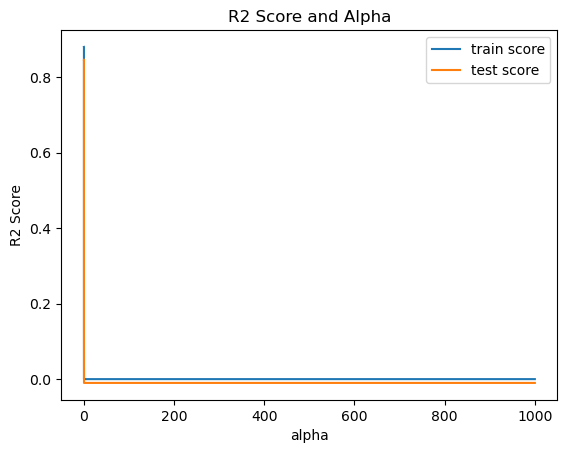

The optimum alpha is 0.0001
The R2 Score of the model on the test dataset for optimum alpha is 0.8633049272469787
The MSE of the model on the test dataset for optimum alpha is 0.024310505985110805


In [232]:
# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [238]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.8625273548798731
The MSE of the model on the test dataset for optimum alpha is 0.024448793176475275


In [240]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
OverallQual              0.744589
LotArea                  0.315264
Condition2               0.310771
SaleType                 0.292043
TotRmsAbvGrd             0.288071
OverallCond              0.279143
FullBath                 0.269663
GarageArea               0.250040
BsmtFullBath             0.197690
Fireplaces               0.174043
LotFrontage              0.153911
WoodDeckSF               0.148162
ScreenPorch              0.140376
MasVnrArea               0.123568
GarageCars               0.114842
3SsnPorch                0.104617
Heating                  0.090333
SaleCondition            0.089355
BsmtHalfBath             0.086696
BsmtQual                 0.085266

# Solving Subjective questions 

In [237]:
# Building Ridge Model by doubling the value of alpha to 2
ridge_double = Ridge(alpha=2,random_state=100)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8613660112136982
The MSE of the model on the test dataset for doubled alpha is 0.024655332092463324
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
OverallQual                           0.683949
TotRmsAbvGrd                          0.279286
LotArea                               0.272825
OverallCond                           0.264664
FullBath                              0.260146
SaleType                              0.251837
Condition2                            0.245109
GarageArea                            0.233239
BsmtFullBath                          0.193642
Fireplaces                            0.183341
LotFrontage                           0.154358
WoodDeckSF                            0.145741
GarageCars                            0.136393
ScreenPorch                           0.133906
MasVnrArea                            0.117482
3SsnPorch                             0.092345
BsmtQual                              0.090132
Heating                               0.082531
HalfBath                              0.079371
BsmtHalfBath                          0.079097

In [241]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
OverallQual              0.828367
Condition2               0.396963
LotArea                  0.375448
SaleType                 0.326164
TotRmsAbvGrd             0.298923
OverallCond              0.289127
GarageArea               0.276551
FullBath                 0.275483
BsmtFullBath             0.199511
Fireplaces               0.159973
LotFrontage              0.151359
WoodDeckSF               0.145459
ScreenPorch              0.139219
MasVnrArea               0.125636
SaleCondition            0.109163
3SsnPorch                0.097613
BsmtHalfBath             0.086918
Heating                  0.082362
BsmtQual                 0.080287
GarageCars               0.078469

In [242]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_double = Lasso(alpha=0.0002,random_state=100)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8644653088397327
The MSE of the model on the test dataset for doubled alpha is 0.024104138168864597
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
OverallQual                            0.834039
Condition2                             0.370796
LotArea                                0.367510
SaleType                               0.300736
TotRmsAbvGrd                           0.296646
OverallCond                            0.283590
GarageArea                             0.274438
FullBath                               0.268523
BsmtFullBath                           0.197568
Fireplaces                             0.159682
LotFrontage                            0.152348
WoodDeckSF                             0.141475
ScreenPorch                            0.132206
MasVnrArea                             0.119121
SaleCondition                          0.093215
BsmtQual                               0.081470
GarageCars                             0.079645
BsmtHalfBath                           0.077701
3SsnPorch                              0.077078
HalfBath                               0.073872

In [244]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe3 = X_test_rfe2.drop(['OverallQual','Condition2','LotArea','SaleType','TotRmsAbvGrd'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['OverallQual','Condition2','LotArea','SaleType','TotRmsAbvGrd'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.7930647546728817
The MSE of the model on the test dataset is 0.03680235445753542
The most important predictor variables are as follows:


Lasso Co-Efficient
FullBath               0.458939
OverallCond            0.349560
GarageArea             0.325287
Fireplaces             0.311459
LotFrontage            0.237539